In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Data Preparation

In [ ]:
# a. Load the wine quality dataset from UCI

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=';')

In [ ]:

# b. Extract feature data (all columns except 'quality')
X = wine_data.drop('quality', axis=1)

# Extract target labels (the 'quality' column)
y = wine_data['quality']

# Display the first few rows to verify
print(X.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    5
1

In [ ]:
# c. Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check for duplicates in the dataset
num_duplicates = wine_data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

wine_data.drop_duplicates(keep='first', inplace=True)

# Check the number of duplicates after dropping
num_duplicates_after_drop = wine_data.duplicated().sum()
print(f"Number of duplicate rows after dropping: {num_duplicates_after_drop}")




Number of duplicate rows in the dataset: 240
Number of duplicate rows after dropping: 0


In [ ]:
# d. Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Create the interaction feature
wine_data['alcohol_sulphates_interaction'] = wine_data['alcohol'] * wine_data['sulphates']

# Print some info
print(f"New interaction feature created: {wine_data['alcohol_sulphates_interaction'].name}")

# Display the first few rows to verify
print(wine_data.head())

New interaction feature created: alcohol_sulphates_interaction
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  al

In [ ]:
# e.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into cross-validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes of the scaled datasets to verify
print(f"Scaled Training set: X_train_scaled shape = {X_train_scaled.shape}")
print(f"Scaled Validation set: X_val_scaled shape = {X_val_scaled.shape}")
print(f"Scaled Testing set: X_test_scaled shape = {X_test_scaled.shape}")


Scaled Training set: X_train_scaled shape = (959, 11)
Scaled Validation set: X_val_scaled shape = (320, 11)
Scaled Testing set: X_test_scaled shape = (320, 11)


In [ ]:
# Look at data statistics
wine_data.describe().T # Changed 'winr_data' to 'wine_data'

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


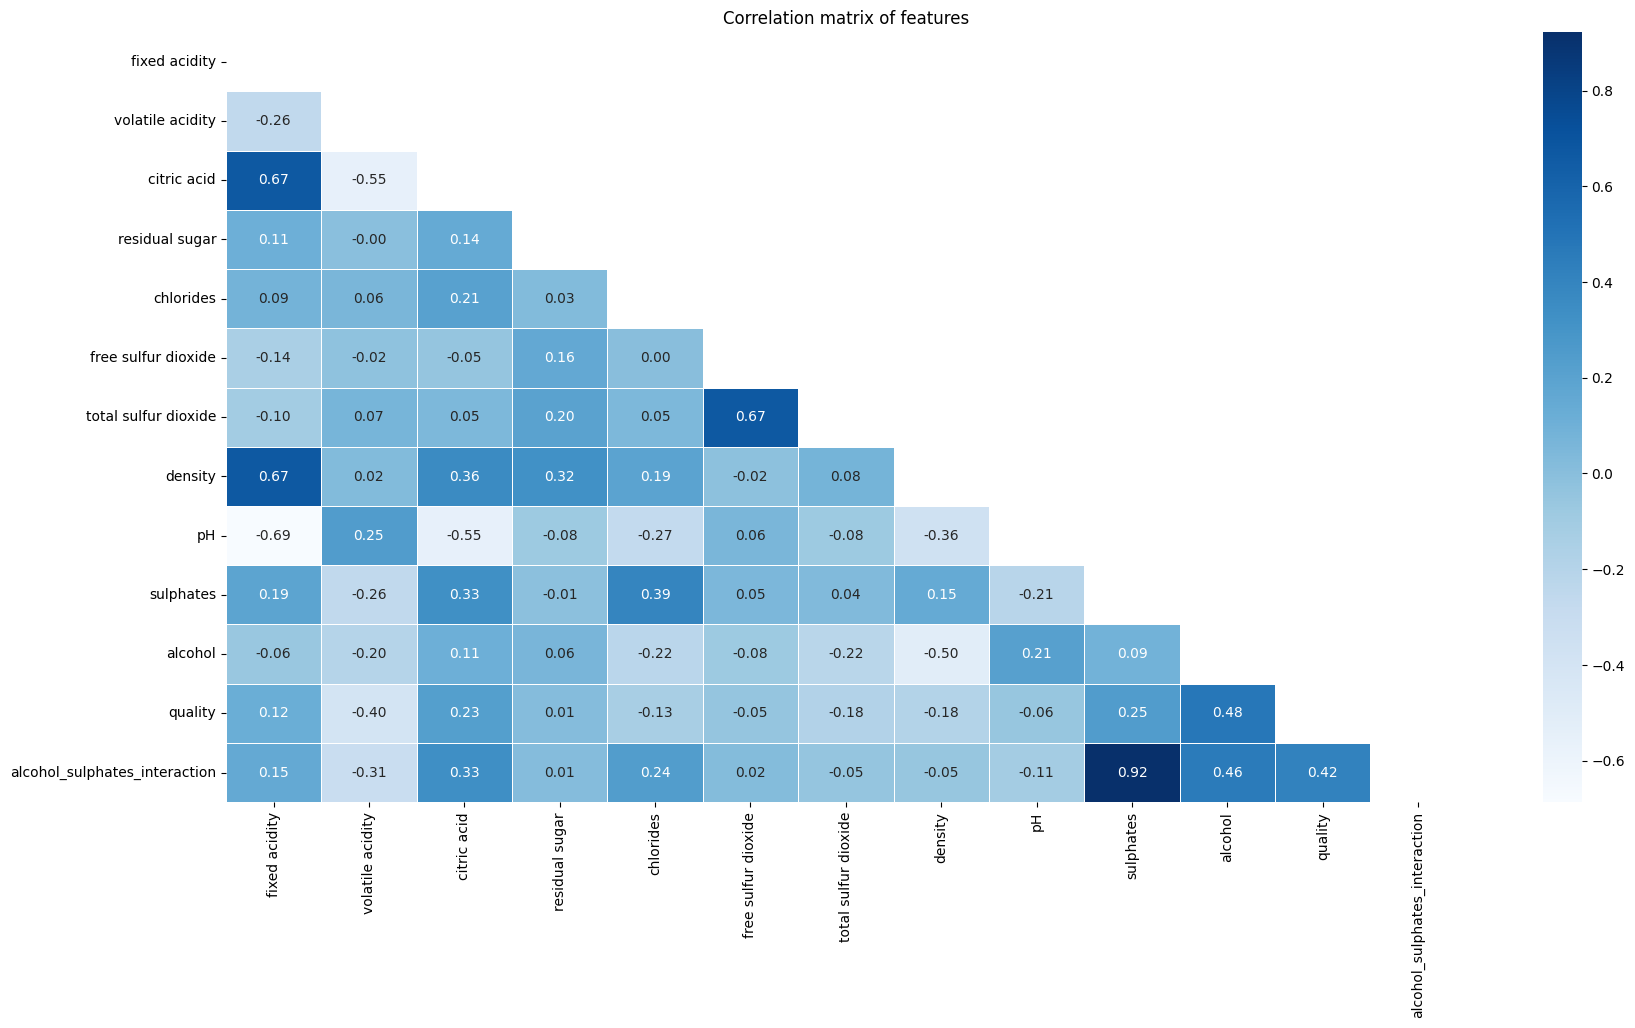

In [ ]:
correlation_matrix = wine_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidth=0.5, cmap='Blues', mask=np.triu(correlation_matrix))
plt.title("Correlation matrix of features")
plt.show()

In [ ]:
# Calculate correlation with the target variable (assuming 'quality' is the target)
correlation_with_target = wine_data.corr()['quality'].abs().sort_values(ascending=False)

# Display the top 5 features with highest correlation with the target
top_features = correlation_with_target.index[1:] # Exclude the target variable itself

# Print top feature list
print("Top features correlated with the target:")
for i, feature in enumerate(top_features, start=1):
    if i > 5:
        break  # Stop after printing the top 5 features
    print(f"{i}. {feature}")

Top features correlated with the target:
1. alcohol
2. alcohol_sulphates_interaction
3. volatile acidity
4. sulphates
5. citric acid


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fixed acidity                  1359 non-null   float64
 1   volatile acidity               1359 non-null   float64
 2   citric acid                    1359 non-null   float64
 3   residual sugar                 1359 non-null   float64
 4   chlorides                      1359 non-null   float64
 5   free sulfur dioxide            1359 non-null   float64
 6   total sulfur dioxide           1359 non-null   float64
 7   density                        1359 non-null   float64
 8   pH                             1359 non-null   float64
 9   sulphates                      1359 non-null   float64
 10  alcohol                        1359 non-null   float64
 11  quality                        1359 non-null   int64  
 12  alcohol_sulphates_interaction  1359 non-null   float6

In [ ]:
# Z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
apply_smote = False

if apply_smote:
  # Apply SMOTE to training data
  smote = SMOTE(random_state=23)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
else:
  X_train_resampled = X_train_scaled
  y_train_resampled = y_train

In [ ]:
# Apply PCA to the training data
pca = PCA(n_components=10)  # Set the number of principal components you want to keep
X_train_pca = pca.fit_transform(X_train_resampled)

# Transform the validation and test data using the fitted PCA
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(type(X_train_pca))

<class 'numpy.ndarray'>


In [ ]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder on the entire target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Transform all target variables
y_train_resampled = label_encoder.transform(y_train_resampled)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

#Model Building and Training

In [ ]:
# Import the necessary class from scikit-learn
from sklearn.linear_model import LogisticRegression
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Import the SVC class
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

In [ ]:
# Hyperparameter tuning parameters SMALL SET OF PARAMETERS TO TEST
param_grids = {
    'Logistic Regression': {
        'C': np.logspace(-4, 4, 3)
    },
    'Decision Tree': {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Classifier': {
        'C': np.logspace(-3, 2, 3),
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [10, 50],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 6],
        'learning_rate': np.linspace(0.01, 0.3, 3),
        'subsample': [0.4, 0.8]
    }
}

In [93]:
# Find the best model using RandomizedSearchCV
best_model = None
best_accuracy = 0
best_model_name = ""

print("Performing Hyperparameter Tuning and Model Evaluation on Validation Set:\n")
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_grid = param_grids[model_name]
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=40)

    # Fit the model
    random_search.fit(X_train_pca, y_train_resampled)

    # Validate the model
    y_val_pred = random_search.best_estimator_.predict(X_val_pca)
    accuracy = accuracy_score(y_val, y_val_pred)


    # Print accuracy
    print(f"{model_name}: Best Parameters = {random_search.best_params_}, Accuracy = {accuracy:.4f}")

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = random_search.best_estimator_
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with Accuracy = {best_accuracy:.4f}")

Performing Hyperparameter Tuning and Model Evaluation on Validation Set:

Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression: Best Parameters = {'C': 1.0}, Accuracy = 0.5719
Tuning Decision Tree...
Decision Tree: Best Parameters = {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}, Accuracy = 0.5594
Tuning Support Vector Classifier...
Support Vector Classifier: Best Parameters = {'kernel': 'rbf', 'gamma': 'auto', 'C': 100.0}, Accuracy = 0.5844
Tuning Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest: Best Parameters = {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}, Accuracy = 0.6656
Tuning K-Nearest Neighbors...
K-Nearest Neighbors: Best Parameters = {'weights': 'distance', 'n_neighbors': 30}, Accuracy = 0.6406
Tuning XGBoost...
XGBoost: Best Parameters = {'subsample': 0.4, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.155}, Accuracy = 0.6281

Best Model: Random Forest with Accuracy = 0.6656


#Model Performance


Test Accuracy of the Best Model (Random Forest): 0.6344

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00        11
           2       0.69      0.73      0.71       135
           3       0.59      0.69      0.64       126
           4       0.59      0.44      0.50        39
           5       1.00      0.00      0.00         7

    accuracy                           0.63       320
   macro avg       0.81      0.31      0.31       320
weighted avg       0.66      0.63      0.61       320



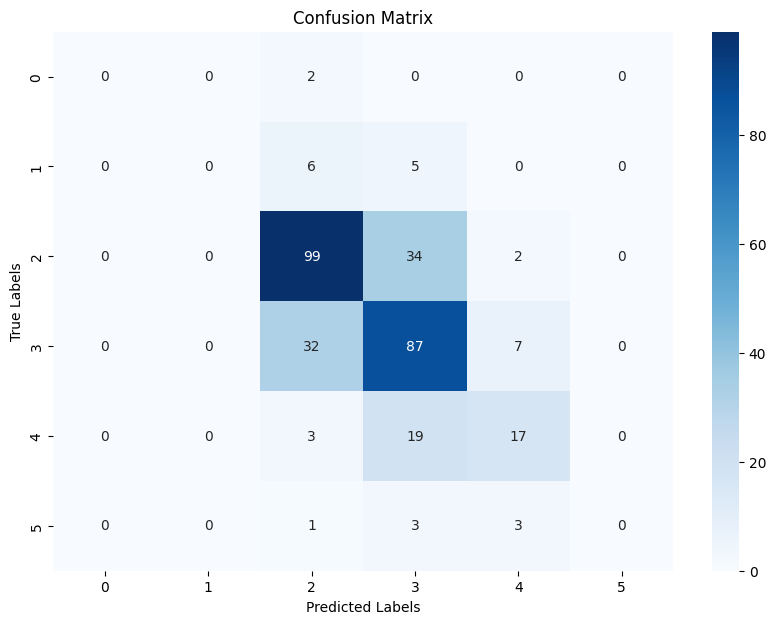


Classification Report for Classes 3 to 8:
              precision    recall  f1-score   support

           3       0.80      0.69      0.74       126
           4       0.63      0.44      0.52        39
           5       1.00      0.00      0.00         7
           6       1.00      1.00      1.00         0
           7       1.00      1.00      1.00         0
           8       1.00      1.00      1.00         0

   micro avg       0.76      0.60      0.68       172
   macro avg       0.90      0.69      0.71       172
weighted avg       0.77      0.60      0.66       172



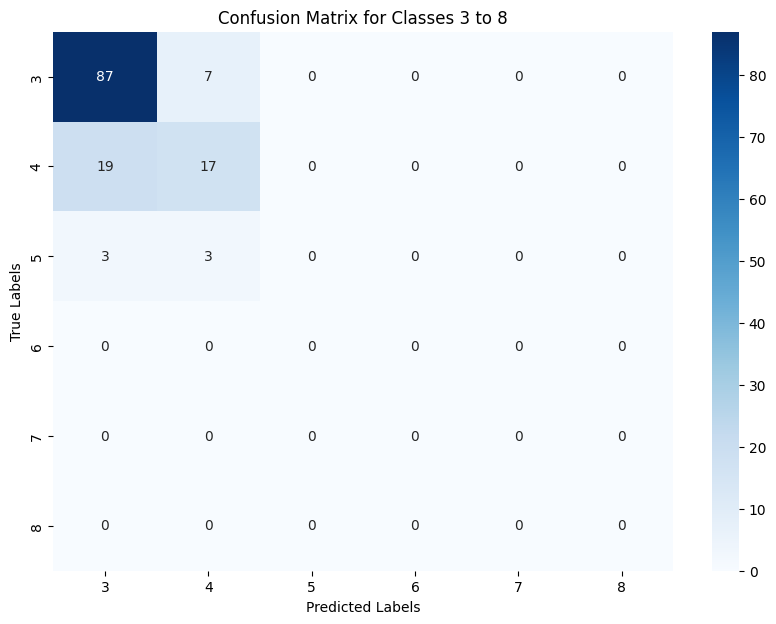

In [85]:
# Model Performance

# Evaluate the model on the test data
y_test_pred = best_model.predict(X_test_pca)

# Print overall test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy of the Best Model ({best_model_name}): {test_accuracy:.4f}")

# Print overall classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Filter test data and predictions for specific classes (3 to 8)
classes_to_include = [3, 4, 5, 6, 7, 8]
mask = np.isin(y_test, classes_to_include)
y_test_filtered = y_test[mask]
y_test_pred_filtered = y_test_pred[mask]

# Print filtered classification report
print("\nClassification Report for Classes 3 to 8:")
print(classification_report(y_test_filtered, y_test_pred_filtered, labels=classes_to_include, zero_division=1))

# Confusion Matrix for filtered classes
conf_matrix_filtered = confusion_matrix(y_test_filtered, y_test_pred_filtered, labels=classes_to_include)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', xticklabels=classes_to_include, yticklabels=classes_to_include)
plt.title('Confusion Matrix for Classes 3 to 8')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [86]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 0  0  2  0  0  0]
 [ 0  0  6  5  0  0]
 [ 0  0 99 34  2  0]
 [ 0  0 32 87  7  0]
 [ 0  0  3 19 17  0]
 [ 0  0  1  3  3  0]]


In [94]:
# 4c. Compute and print cross-validation F1 score
from sklearn.metrics import f1_score, make_scorer # Import the make_scorer function
from sklearn.model_selection import cross_val_score # Import the cross_val_score function

f1_scorer = make_scorer(f1_score, average='weighted')
cv_scores = cross_val_score(best_model, X_train_pca, y_train_resampled, cv=50, scoring=f1_scorer)
cv_f1_score = np.mean(cv_scores)

# Print the cross-validation F1 score
print(f"Cross-Validation F1 Score: {cv_f1_score:.4f}")

# Compute and print test F1 score
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

# Print the test F1 score
print(f"Test F1 Score: {test_f1_score:.4f}")

# Print the product of cross-validation F1 score and test F1 score
product_f1_scores = cv_f1_score * test_f1_score
print(f"Product of Cross-Validation F1 Score and Test F1 Score: {product_f1_scores:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=50.
  warnings.warn(


Cross-Validation F1 Score: 0.6411
Test F1 Score: 0.6115
Product of Cross-Validation F1 Score and Test F1 Score: 0.3920


#Report

Model Selection Report
Best Model: Random Forest
Based on the results of hyperparameter tuning and model evaluation, the Random Forest model achieved the highest accuracy of 0.6656 on the validation set, making it the best-performing model among all those tested.

Factors Beyond Performance

Model Interpretability:
Random Forest models are moderately interpretable. While they are not as transparent as a Logistic Regression model, they allow for feature importance analysis, which provides insights into which features most strongly impact predictions.
Decision trees within the forest can be visualized, though interpreting a large ensemble of trees can be complex.

Challenges Encountered

Imbalanced Dataset:
One of the key challenges was the potential for class imbalance in the dataset. Accuracy alone may not be the best metric to evaluate models on imbalanced datasets. Using metrics like F1-score or ROC-AUC could provide more insights into how well the model handles minority classes.

Recommendations for Future Improvements

Ensemble Methods:
A further improvement to performance could be made by using ensemble techniques. Combining predictions from multiple models (e.g., Voting Classifier or Stacking) might improve robustness and predictive power.